<h3>Predicting Rental Prices</h3>

In [2]:
%load_ext autoreload
%autoreload 2

import lib, data, model
import graphs as gr
 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<h5>Part 1: Load the cleaned data</h5>

Including feature engineering
- identify the student properties by spotting the word "student" in description

In [3]:
df = data.cleanBBData()

In [3]:
# df[df.duplicated('listing_id', keep = 'first')]

In [23]:
df.head(3).T

,0,1,2
bills_included,0,0,0
description,St James's Square is the prime Grade I Listed ...,Seven bedroom student property located on Chel...,Property Reference: 692630.Key FeaturesHigh Qu...
details_url,https://www.zoopla.co.uk/to-rent/details/51435...,https://www.zoopla.co.uk/to-rent/details/53267...,https://www.zoopla.co.uk/to-rent/details/53826...
first_published_date,2019-12-06 12:30:57,2019-11-07 16:37:46,2020-01-01 20:23:31
floor_plan,1,1,0
furnished_state,unfurnished,furnished,furnished
latitude,51.3889,51.3853,51.3987
listing_id,51435492,53267805,53826970
longitude,-2.36887,-2.38896,-2.33808
num_bathrooms,4,0,4


<h4>Part 2: EDA</h4>

In [5]:
# df[(df['num_bedrooms']==0) & (df['property_type']!='Studio')]
df.at[199, 'num_bedrooms'] = 6
df.at[199, 'num_bathrooms'] = 2

In [6]:
import warnings
warnings.filterwarnings('ignore')

# focusing on student lettings
student = data.getStudentRentals(df)

In [7]:
# BA2_rented = BA2_stud[(BA2_stud['rented']==1)]
# BA2_non_rented = BA2_stud[(BA2_stud['rented']==0)]
student.describe()

,bills_included,floor_plan,latitude,listing_id,longitude,num_bathrooms,num_bedrooms,num_recepts,rent_price,shared_occu,student,rented,room_pm
count,675.000000,675.000000,675.000000,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.0,675.000000,675.000000
mean,0.100741,0.137778,51.443043,5.208150e+07,-2.541829,0.856296,3.662222,0.525926,2028.586667,0.026667,1.0,0.253333,569.137778
std,0.301208,0.344922,0.041231,3.049753e+06,0.095477,1.022783,2.147038,0.589594,984.659175,0.161227,0.0,0.435243,129.724407
min,0.000000,0.000000,51.355175,1.792825e+07,-2.622776,0.000000,0.000000,0.000000,400.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,51.436872,5.229436e+07,-2.602825,0.000000,2.000000,0.000000,1250.000000,0.000000,1.0,0.000000,490.000000
50%,0.000000,0.000000,51.454760,5.332676e+07,-2.591060,1.000000,4.000000,0.000000,2000.000000,0.000000,1.0,0.000000,545.000000
75%,0.000000,0.000000,51.468445,5.350720e+07,-2.526422,1.000000,5.000000,1.000000,2650.000000,0.000000,1.0,1.000000,620.000000
max,1.000000,1.000000,51.504770,5.384874e+07,-2.322673,6.000000,12.000000,2.000000,6165.000000,1.000000,1.0,1.000000,1100.000000


In [10]:
# pd.pivot_table(student, values='room_pm', index=['num_bathrooms'], columns=['num_bedrooms'], aggfunc=np.median)

<h3>Q1: What does the current student rental market looks like?</h3>

- how many 1 bed, 2 beds available | how many contain bills
- how many bathrooms for a certain size bedroom

In [16]:
# region = student[(student['outcode'] == 'BA2') | (student['outcode'] == 'BA1')]
region = student[(student['outcode'] == 'BS7') | (student['outcode'] == 'BS16')]

title = 'BS7 & BS16'

grouped = data.getPerBedroomOvreview(region)

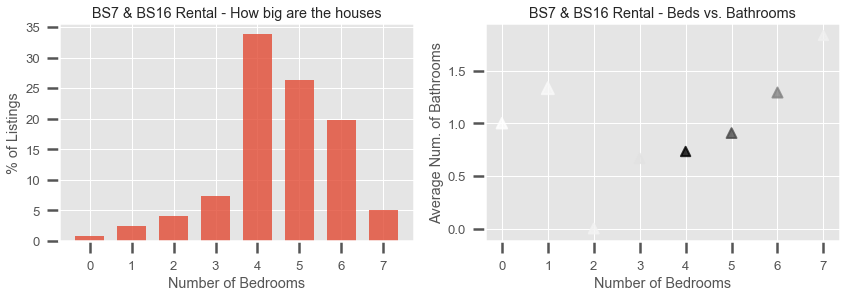

In [17]:
gr.areaOverview(grouped,title)

<h3>Q2: How much landlord should list property for?</h3>

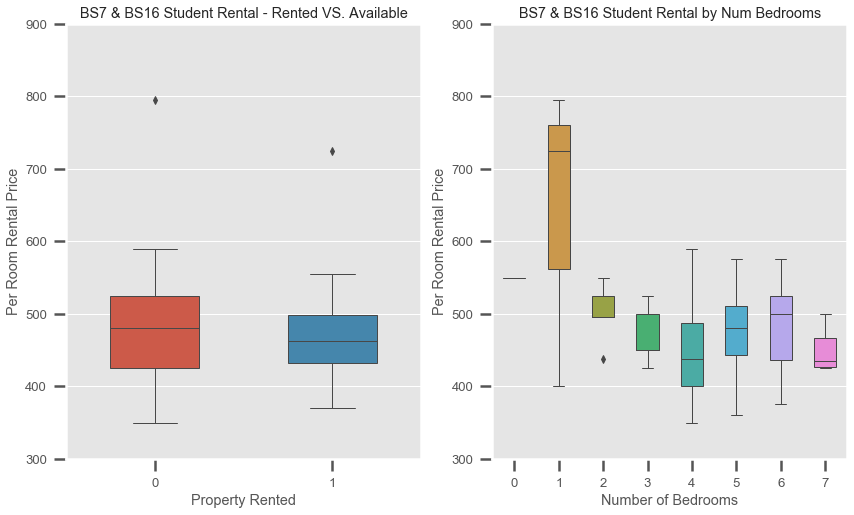

In [18]:
# GRAPH

# graph_a = BA2_stud.plot.scatter('num_bathrooms', 'room_pm', c = 'rented',
#                   colormap = 'rainbow')

# region = student[(student['outcode'] == 'BS7') | (student['outcode'] == 'BS16')]
gr.rentPriceGraphs(region,title,'room_pm',300,900)

<h3>Q3: How much rent would generate by adding extra bathroom?</h3>


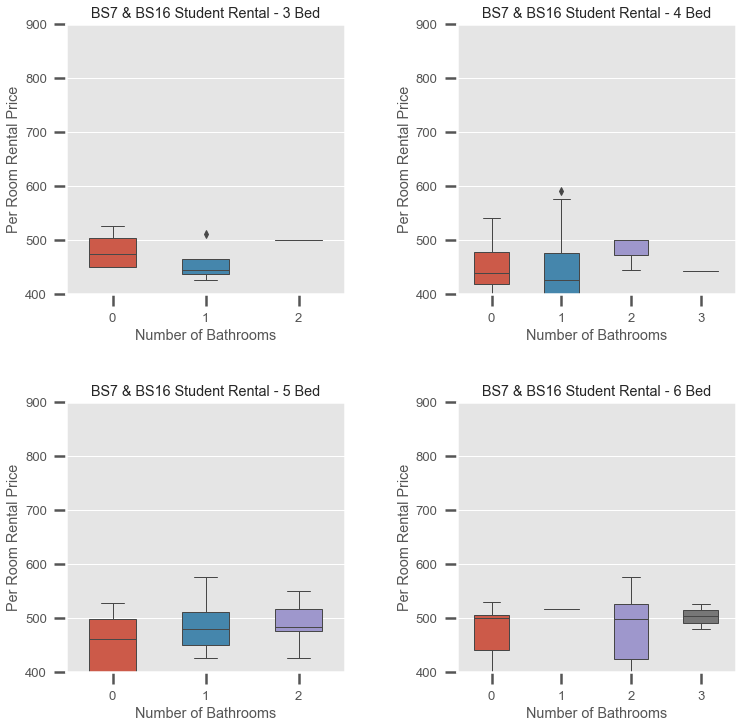

In [19]:
# region = student[(student['outcode'] == 'BA2') | (student['outcode'] == 'BA1')]
gr.rentPriceBedBath(region,title,'room_pm',400,900)

In [22]:
region = student[(student['outcode'] == 'BS7')]
data.getBathroomsByProperSize(region)

,num_bedrooms,num_bathrooms,count,proportion%,rent_pm
0,0,1,1,100.0,550.0
1,1,1,2,66.7,760.0
2,1,2,1,33.3,400.0
3,2,0,5,100.0,495.0
4,3,0,4,44.4,473.5
5,3,1,4,44.4,445.0
6,3,2,1,11.1,500.0
7,4,0,16,39.0,438.0
8,4,1,21,51.2,425.0
9,4,2,3,7.3,500.0




NEXT STEP ->


MONDAY
1) GIT big data issue


2) improving model:
- PCA
- polynomial interactions

3) more feature engineering: 
- get more Bristol data
- clustering K-means with long & lat
- NLP, TF-IDF then use key words>



TUESDAY -> start with London data

In [154]:
# delete where bathroom is zero

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [42]:
# Train test split based on random 25%
X = df.drop(columns=['rent_price','listing_id','description','details_url','first_published_date'])
y = df['rent_price']

run = model.ModelTry(X,y)
X_train, X_test, y_train, y_test = run.data_transform()

# polynomial interactions, even degree of 2 is overfitting using both con & categorical
poly = PolynomialFeatures(1)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

reg_poly = LinearRegression().fit(X_train_poly, y_train)
run.print_results(X_train_poly, X_test_poly, y_train, y_test, reg_poly)

Training r^2 %: 56.712
Testing r^2 %: 62.089
Training MSE (mil): 0.3629817444647255
Testing MSE (mil): 0.34421707386252914


In [64]:
# try poly transofrmation just on the cont variables.
# using continous transformation adds around 10% R2, checkout which ones and add these manually

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# remove "object"-type features and y from `X`
con_features = [ col for col in X.columns if X[col].dtype in ['int64','float64']]
X_train_con = X_train.loc[:,con_features]
X_test_con = X_test.loc[:,con_features]

# Scale the train and test data
scaler = MinMaxScaler()
scaler.fit(X_train_con)

X_train_sca = scaler.transform(X_train_con)
X_test_sca = scaler.transform(X_test_con)

poly = PolynomialFeatures(2)
poly.fit(X_train_sca)

X_train_poly = poly.transform(X_train_sca)
X_test_poly = poly.transform(X_test_sca)


# # Create X_cat which contains only the categorical variables
# cat_features = [ col for col in X.columns if X[col].dtype == np.object]
# X_train_cat = X_train.loc[:,cat_features]
# X_test_cat = X_test.loc[:,cat_features]


# # OneHotEncode Categorical variables
# ohe = OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_train_cat)

# X_train_ohe = ohe.transform(X_train_cat)
# X_test_ohe = ohe.transform(X_test_cat)

# columns = ohe.get_feature_names(input_features=X_train_cat.columns)
# cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
# cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

# X_train_all = pd.concat([pd.DataFrame(X_train_poly, columns=con_features), cat_train_df], axis = 1)
# X_test_all = pd.concat([pd.DataFrame(X_test_poly, columns=con_features), cat_test_df], axis = 1)

reg_poly = Lasso(alpha=1).fit(X_train_poly, y_train)
run.print_results(X_train_poly, X_test_poly, y_train, y_test, reg_poly)


Training r^2 %: 75.034
Testing r^2 %: 73.207
Training MSE (mil): 0.20935266669093194
Testing MSE (mil): 0.24326917215848354


In [65]:
model_coef = reg_poly.coef_
model_coef = pd.DataFrame(model_coef, index=poly.get_feature_names(), columns=['coef_value'])
model_coef['coef_abs'] = model_coef['coef_value'].apply(lambda x: np.abs(x))
model_coef.sort_values('coef_abs', ascending=False).head()

,coef_value,coef_abs
x3 x5,4846.829781,4846.829781
x5,3004.914104,3004.914104
x5 x6,-2950.238800,2950.238800
x4 x5,-1966.204722,1966.204722
x5 x8,1780.680018,1780.680018


<h3>Ridge versus Lasso</h3>

In [112]:
from sklearn.linear_model import Lasso

model_las = Lasso(alpha=1)
model_las.fit(X_train_all, y_train)

print('Training r^2 %:', round(model_las.score(X_train_all, y_train),3)*100)
print('Testing r^2 %:', round(model_las.score(X_test_all, y_test),3)*100)
print('Training MSE (mil):', mean_squared_error(y_train, model_las.predict(X_train_all))/1_000_000)
print('Testing MSE (mil):', mean_squared_error(y_test, model_las.predict(X_test_all))/1_000_000)

Training r^2 %: 0.0
Testing r^2 %: -0.2
Training MSE (mil): 3.2467221209220614e-07
Testing MSE (mil): 3.305649754203753e-07


In [113]:
from sklearn.linear_model import Ridge
model_rig = Ridge(alpha=1)
model_rig.fit(X_train_all, y_train)

print('Training r^2 %:', round(model_rig.score(X_train_all, y_train),5)*100)
print('Testing r^2 %:', round(model_rig.score(X_test_all, y_test),4)*100)
print('Training MSE (mil):', mean_squared_error(y_train, model_rig.predict(X_train_all))/1_000_000)
print('Testing MSE (mil):', mean_squared_error(y_test, model_rig.predict(X_test_all))/1_000_000)

Training r^2 %: 54.113
Testing r^2 %: 56.89999999999999
Training MSE (mil): 1.4898120660048011e-07
Testing MSE (mil): 1.4225382081698486e-07


In [114]:
# number of Lasso params almost zero
print(sum(abs(model_las.coef_) < 10**(-3)))

32


<h3>Model Assumption Checking</h3>

1. check residuals are normally distributed

2. scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line)

3. Multicollinearity of Features

In [89]:
# !pip install yellowbrick

In [73]:
# No major multicolinearity issue apart from long and lat, because we only plots two cities

# X_train_all.corr()*100
# abs(df.corr()) > 0.70
pd.DataFrame(np.tril(X_train.corr().values*100))

,0,1,2,3,4,5,6,7,8,9
0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-12.885757,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-6.188095,-15.062436,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,6.075554,17.530509,-88.695089,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,12.098687,14.828663,-10.136185,12.307293,100.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-6.906702,1.773038,6.661032,-3.781435,39.085693,100.000000,0.000000,0.000000,0.000000,0.0
6,1.704712,19.394426,-7.306831,10.898545,50.405613,16.972282,100.000000,0.000000,0.000000,0.0
7,19.285060,-7.485806,2.890770,-4.845482,-1.870137,-15.153844,-9.514045,100.000000,0.000000,0.0
8,6.325914,-24.449327,2.969774,-5.506569,-9.942528,14.309061,-12.844250,-3.496480,100.000000,0.0
9,-10.206110,15.314322,-0.967924,2.741934,23.832090,12.497805,26.973666,-5.465214,-15.945468,100.0


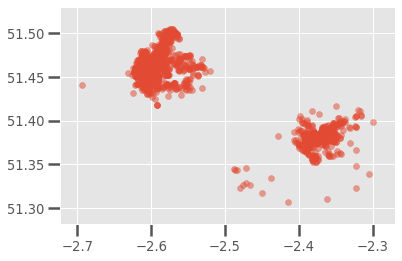

In [78]:
plt.scatter(df.longitude, df.latitude, marker='.', alpha=0.5);